## 1.1 Linear Models

#### 1.1.1 Ordinary Least Squares (Linear Regression)

In [1]:
from sklearn import linear_model

In [3]:
reg = linear_model.LinearRegression()

reg.fit([[0,0],[1,1],[2,2]],[0,1,2])
reg.coef_

array([0.5, 0.5])

Another example

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
#load dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

#use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [8]:
#train test split on the data
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

#train test split on the targets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [9]:
#instantiate linear regression object and train the model
regr = linear_model.LinearRegression()

regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [10]:
#make predictions using the test set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [14]:
#print coefficients
print(f"Coefficients: {regr.coef_}")

print(f'MSE: {mean_squared_error(diabetes_y_test, diabetes_y_pred)}')
print(f"R2 score: {r2_score(diabetes_y_test, diabetes_y_pred)}")

Coefficients: [938.23786125]
MSE: 2548.0723987259703
R2 score: 0.47257544798227136


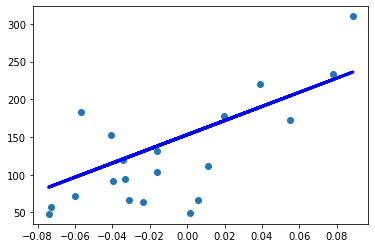

In [18]:
#plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test)
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)


#### 1.1.1.1 Non-Negative Least Squares

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [20]:
#optional - set a random seed
np.random.seed(42)

#generate random data
n_samples = 200
n_features = 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)

#threshold coefficients to ensure they are non-negative
true_coef[true_coef < 0] = 0

y = np.dot(X, true_coef)

#add noise
y += 5 * np.random.normal(size = (n_samples,))

In [21]:
#split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

In [22]:
#fit the non-negative least squares
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive = True)


In [24]:
#make predictions and score
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)

print(f"NNLS R2 score: {r2_score_nnls}")

NNLS R2 score: 0.8225220806196525


In [25]:
#fit an OLS
reg_ols = LinearRegression()

y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)

print(f"OLS R2 score: {r2_score_ols}")

OLS R2 score: 0.7436926291700343


Text(0, 0.5, 'NNLS regression coefficients')

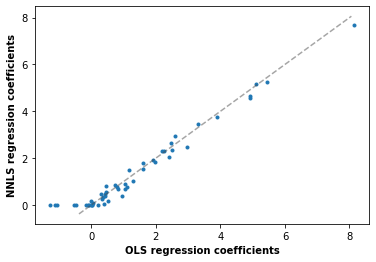

In [26]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

### 1.1.2 Ridge regression and classification

#### 1.1.2.1 Regression

In [27]:
from sklearn import linear_model

reg = linear_model.Ridge(alpha = 0.5)

reg.fit([[0,0], [0,0], [1,1]], [0, 0.1, 1])

Ridge(alpha=0.5)

In [28]:
reg.coef_

array([0.34545455, 0.34545455])

In [29]:
reg.intercept_

0.1363636363636364

Another example

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

In [37]:
#X is the 10x0 Hilbert matrix (??)
X = 1.0 / (np.arange(1,11) + np.arange(0,10)[:, np.newaxis])

y = np.ones(10)

In [38]:
X

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [39]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [40]:
#compute paths
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []

for a in alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

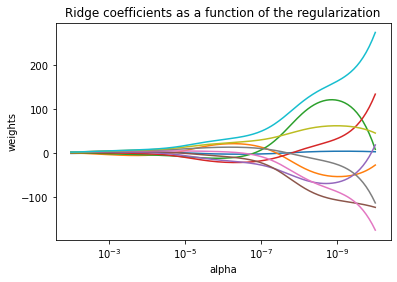

In [41]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

Ridge complexity has the same order of magnitude as OLS complexity

#### 1.1.2.4 Setting the regularization parameter: leave-one-out Cross Validation

RidgeCV implements ridge regression with built-in cross-validation of the alpha parameter

In [42]:
import numpy as np
from sklearn import linear_model

In [44]:
reg = linear_model.RidgeCV(alphas = np.logspace(-6,6,13))

reg.fit([[0,0], [0,0], [1,1]], [0, 0.1, 1])

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

In [45]:
reg.alpha_

0.01

### 1.1.3 Lasso

The Lasso is **a linear model that estimates sparse coefficients**

It tends to prefer solutions with fewer non-zero coefficients, which can reduces the number of features that will actually affect the solution

In [46]:
from sklearn import linear_model

In [47]:
reg = linear_model.Lasso(alpha = 0.1)
reg.fit([[0,0], [1,1]], [0,1])

Lasso(alpha=0.1)

In [49]:
reg.predict([[1,1]])

array([0.8])

=============================================
* Another example - Lasso and Elastic Net for Sparse Signals

In [51]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [52]:
np.random.seed(42)

#generate sparse data
n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

In [53]:
X

array([[ 0.49671415, -0.1382643 ,  0.64768854, ...,  0.26105527,
         0.00511346, -0.23458713],
       [-1.41537074, -0.42064532, -0.34271452, ...,  0.15372511,
         0.05820872, -1.1429703 ],
       [ 0.35778736,  0.56078453,  1.08305124, ...,  0.30729952,
         0.81286212,  0.62962884],
       ...,
       [-0.992866  , -1.44520526,  0.66626967, ..., -1.94937176,
        -2.05035746,  0.73918049],
       [ 0.50702027, -0.05739537, -1.3954485 , ..., -1.12004742,
         0.67091125,  0.60379052],
       [-0.39187677, -1.01776431, -1.02740355, ...,  3.1129102 ,
         0.80803619, -0.8480656 ]])

In [60]:
#decreasing coefficients with alternated signs for visualization
idx = np.arange(n_features)
coef = (-1)** idx * np.exp(-idx / 10)

#sparsify coef
coef[10:] = 0

y = np.dot(X, coef)

#add noise
y += 0.01 * np.random.normal(size = n_samples)

In [61]:
y

array([ 0.05868774,  0.01573947, -1.72365514,  1.0720574 , -2.42506067,
       -2.05349311, -0.76568952, -5.61060388,  3.0029248 , -1.80683056,
        2.20123171,  6.61372855, -1.17800038,  0.06802314, -1.53573425,
        0.1122106 , -1.62186833, -0.1906823 ,  1.0707779 ,  0.44898261,
       -2.04287716, -3.35829499,  3.09247636,  1.19401381, -1.09040506,
        0.56876276, -1.74495231, -0.90828142,  0.80771497, -2.22494833,
        0.01749412, -1.65066486, -1.8008078 ,  3.1278658 ,  1.42396057,
        2.91664859,  1.12743261, -1.45182882, -0.98781938,  4.89674593,
       -4.08959078, -1.57164298,  3.35542511, -1.03076004, -2.03530214,
       -1.12951198, -1.07915963,  2.35449225,  0.82627719,  0.58702813])

In [64]:
#split the data
n_samples = X.shape[0]

X_train, y_train = X[: n_samples // 2], y[: n_samples // 2]
X_test, y_test = X[n_samples // 2 :], y[n_samples // 2 :]

In [65]:
# Lasso
from sklearn.linear_model import Lasso

In [66]:
lasso = Lasso(alpha = 0.1)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

In [68]:
print(lasso)
print(f"Lasso R2 score: {r2_score_lasso}")

Lasso(alpha=0.1)
Lasso R2 score: 0.6580638417732383


In [70]:
#ElasticNet
from sklearn.linear_model import ElasticNet

In [72]:
enet = ElasticNet(alpha = 0.1, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)

In [75]:
print(enet)
print(f"ElasticNet R2 score on test data: {r2_score_enet}")

ElasticNet(alpha=0.1, l1_ratio=0.7)
ElasticNet R2 score on test data: 0.6425152496145801


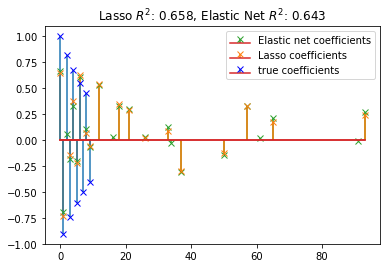

In [76]:
m, s, _ = plt.stem(
    np.where(enet.coef_)[0],
    enet.coef_[enet.coef_ != 0],
    markerfmt="x",
    label="Elastic net coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(
    np.where(lasso.coef_)[0],
    lasso.coef_[lasso.coef_ != 0],
    markerfmt="x",
    label="Lasso coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#ff7f0e")
plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label="true coefficients",
    markerfmt="bx",
    use_line_collection=True,
)

plt.legend(loc="best")
plt.title(
    "Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" % (r2_score_lasso, r2_score_enet)
)
plt.show()

### 1.1.4 Multi-task Lasso

MultiTaskLasso is **a linear model that estimates sparse coefficients for multiple regression problems jointly**, where y is a 2D array

+++++++++++
* Example

In [78]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

In [80]:
rng = np.random.RandomState(42)
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5

coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)

for k in range(n_relevant_features):
    coef[:, k] = np.sin((1 + rng.randn(1)) * times + 3 * rng.randn(1))

In [81]:
X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

In [86]:
coef_lasso_ = np.array([Lasso(alpha = 0.5).fit(X,y).coef_ for y in Y.T])

coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.0).fit(X, Y).coef_


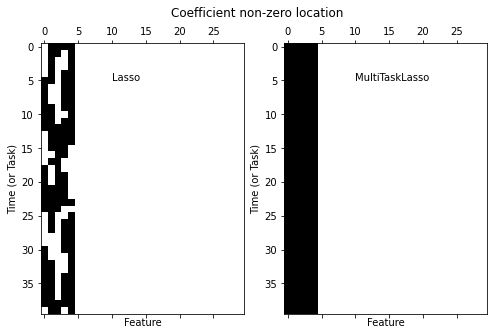

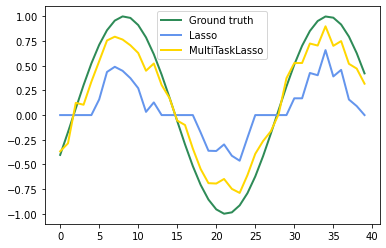

In [87]:
# Plot support and time series
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "Lasso")
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "MultiTaskLasso")
fig.suptitle("Coefficient non-zero location")

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color="seagreen", linewidth=lw, label="Ground truth")
plt.plot(
    coef_lasso_[:, feature_to_plot], color="cornflowerblue", linewidth=lw, label="Lasso"
)
plt.plot(
    coef_multi_task_lasso_[:, feature_to_plot],
    color="gold",
    linewidth=lw,
    label="MultiTaskLasso",
)
plt.legend(loc="upper center")
plt.axis("tight")
plt.ylim([-1.1, 1.1])
plt.show()

### 1.1.5 Elastic-Net

### 1.1.6 Multi-task Elastic_net

### 1.1.7 Least Angle Regression
Also known as LARS

### 1.1.8 LARS Lasso
Unlike the implementation based on coordinate descent, this yields the exact solution as a piecewise linear function of the norm and its coefficients

In [89]:
from sklearn import linear_model

reg = linear_model.LassoLars(alpha = 0.1, normalize = False)
reg.fit([[0,0], [1,1]], [0,1])

reg.coef_

array([0.6, 0. ])

+++++++++++++++++++++++++++++++++++

Example - **Lasso path using LARS**

In [90]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

In [91]:
X, y = datasets.load_diabetes(return_X_y = True)

In [93]:
#computing regularization path using LARS
_, _, coefs = linear_model.lars_path(X, y, method = 'lasso', verbose = True)

xx = np.sum(np.abs(coefs.T), axis = 1)
xx /= xx[-1]

.

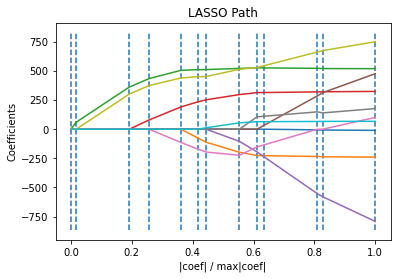

In [94]:
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

### 1.1.9 Orthogonal Matching Pursuit (OMP)

In [95]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV

from sklearn.datasets import make_sparse_coded_signal

In [102]:
n_components, n_features = 512, 100
n_nonzero_coefs = 17

#generate the data
y, X, w = make_sparse_coded_signal(n_samples = 1,
                                  n_components = n_components,
                                  n_features = n_features,
                                  n_nonzero_coefs= n_nonzero_coefs,
                                  random_state = 0,)

(idx,) = w.nonzero()

In [103]:
y

array([-0.40342123,  0.11240896,  0.54639319,  0.03003388, -0.06436548,
        0.48541692,  0.06591313,  0.91237347, -0.1555025 ,  0.10147145,
       -0.42253433, -0.40796911, -0.37501376,  0.0476276 ,  0.52180477,
        0.72811108, -0.26665926, -0.063533  , -0.0449216 ,  0.12222993,
       -0.80890936, -0.0909473 ,  0.60038564,  0.46512957, -0.63265727,
       -0.70168083,  0.03332405, -0.02825069, -1.15790404, -0.0284593 ,
       -1.03641856, -0.06763479,  0.13928765,  0.28470179,  0.50363333,
       -0.65626023, -0.22481343, -0.03315359, -0.15339506,  0.46653726,
        0.09322094, -0.14101373,  0.00970106,  0.85601693, -0.72421847,
        0.37551812,  0.18109788,  0.13296399,  0.63650967, -0.23512741,
       -0.5455935 ,  0.52145401,  0.34333152,  0.2721521 ,  0.40912153,
        0.5744767 ,  0.00720588,  1.39355494,  0.7059172 ,  0.31333372,
        0.12430432,  0.13786939, -0.71249144, -1.15419638, -0.24272523,
        0.03684655,  0.83478437, -0.37541997,  0.63940471,  0.29

In [104]:
X

array([[ 0.16157379,  0.03962532,  0.10102463, ...,  0.13375648,
         0.09499337,  0.15146072],
       [-0.12202046, -0.19494186, -0.06813054, ...,  0.07205071,
        -0.04429727, -0.12089598],
       [ 0.15683414, -0.07843871, -0.10791829, ...,  0.0291649 ,
        -0.02994296, -0.12758318],
       ...,
       [ 0.09398556,  0.11287435,  0.00604668, ..., -0.05279375,
         0.09354535,  0.04583505],
       [ 0.08923609, -0.05853369,  0.05261061, ..., -0.15081765,
         0.04383746, -0.04648319],
       [ 0.1859695 , -0.14272737,  0.04954196, ...,  0.15001472,
         0.12343332, -0.0627607 ]])

In [105]:
idx

array([ 46,  68,  76, 101, 123, 158, 195, 226, 227, 268, 269, 355, 359,
       399, 467, 492, 494], dtype=int64)

In [107]:
#distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

<StemContainer object of 3 artists>

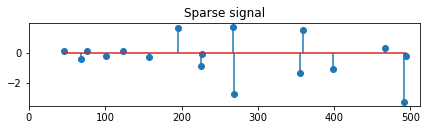

In [108]:
# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx], use_line_collection=True)

In [109]:
#plot the noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs= n_nonzero_coefs, normalize = False)

omp.fit(X, y)
coef = omp.coef_
(idx_r,) = coef.nonzero()

<StemContainer object of 3 artists>

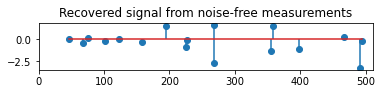

In [110]:
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

In [111]:
#plot the noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
(idx_r,) = coef.nonzero()

<StemContainer object of 3 artists>

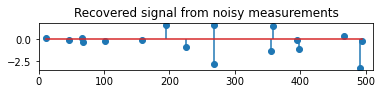

In [112]:
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

In [113]:
#plot the noisy reconstruction ith number of non-zeros set by CV
omp_cv = OrthogonalMatchingPursuitCV(normalize = False)
omp_cv.fit(X, y_noisy)

coef = omp_cv.coef_
(idx_r,) = coef.nonzero()

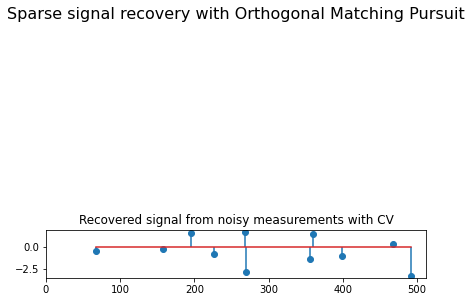

In [117]:
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle("Sparse signal recovery with Orthogonal Matching Pursuit", fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

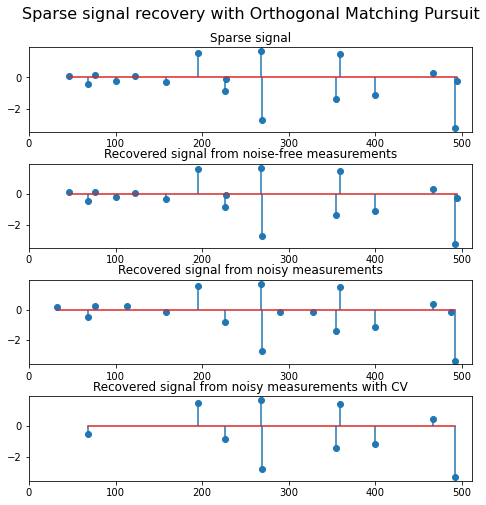

In [118]:
n_components, n_features = 512, 100
n_nonzero_coefs = 17

# generate the data

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(
    n_samples=1,
    n_components=n_components,
    n_features=n_features,
    n_nonzero_coefs=n_nonzero_coefs,
    random_state=0,
)

(idx,) = w.nonzero()

# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx], use_line_collection=True)

# plot the noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs, normalize=False)
omp.fit(X, y)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# plot the noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# plot the noisy reconstruction with number of non-zeros set by CV
omp_cv = OrthogonalMatchingPursuitCV(normalize=False)
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle("Sparse signal recovery with Orthogonal Matching Pursuit", fontsize=16)
plt.show()

### 1.1.10 Bayesian Regression
- adapts to the data at hand
- can be used to include regularization parameters in the estimation procedure

#### 1.1.10.1 Bayesian Ridge Regression

In [119]:
from sklearn import linear_model

In [120]:
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]

In [121]:
reg = linear_model.BayesianRidge()
reg.fit(X, Y)

BayesianRidge()

In [123]:
reg.predict([[1, 0.]])

array([0.50000013])

In [124]:
reg.coef_

array([0.49999993, 0.49999993])